# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padronização de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 07/02/2022;

- Monitoria Projeto 01: 16/02/2022 (possivelmente);

- Data de Entrega: 18/02/2022;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoAluno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

In [30]:
#importação de módulos EAD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importação de modulos ML
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier




In [2]:
#carga
df_ori = pd.read_csv('COVID.csv',index_col=0)
#amostra dados
print(df_ori.head())
#descrição
print(df_ori.info())
#balanço das respostas
print(df_ori.groupby('covid_res').size())

   sex  patient_type  intubed  pneumonia  age  pregnancy  diabetes  copd  \
0    0             1      NaN        0.0   27        NaN       0.0   0.0   
1    0             1      NaN        0.0   24        NaN       0.0   0.0   
2    1             0      0.0        0.0   54        0.0       0.0   0.0   
3    0             0      0.0        1.0   30        NaN       0.0   0.0   
4    1             0      0.0        0.0   60        0.0       1.0   0.0   

   asthma  inmsupr  hypertension  other_disease  cardiovascular  obesity  \
0     0.0      0.0           0.0            0.0             0.0      0.0   
1     0.0      0.0           0.0            0.0             0.0      0.0   
2     0.0      0.0           0.0            0.0             0.0      1.0   
3     0.0      0.0           0.0            0.0             0.0      0.0   
4     0.0      0.0           1.0            0.0             1.0      0.0   

   renal_chronic  tobacco  contact_other_covid  covid_res  icu  
0            0.0     

In [3]:
#Criar uma cópia para dados tratados / alterados
df_tret = df_ori.copy()
# df_tret['nm_age']=pd.qcut(df_tret['age'],4,labels=[0,1,2,3])
# df_tret.drop(['age'],axis=1,inplace=True)
df_tret.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [4]:
df_tret['pregnancy'].mask(df_tret['sex']==0,0,inplace=True) 
#não tem home gravido
df_tret.groupby(['pregnancy','sex']).size()


pregnancy  sex
0.0        0      253098
           1      241644
1.0        1        3614
dtype: int64

In [9]:
#Provas de agregar uma feature de n comorbidades (Não mudou nada)
# df_tret['n_comorbities']=df_tret[['pregnancy',
#        'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
#        'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
#        'tobacco']].sum(axis=1)


In [5]:
df_tret['icu'].mask(df_tret['patient_type']==1,0,inplace=True)
df_tret['intubed'].mask(df_tret['patient_type']==1,0,inplace=True)
df_tret['contact_other_covid'].mask(df_tret['contact_other_covid'].isna(),0,inplace=True)
df_tret.dropna(inplace=True)

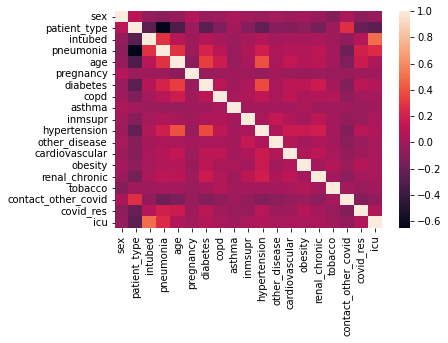

                          sex  patient_type   intubed  pneumonia       age  \
sex                  1.000000      0.097219 -0.040128  -0.086603 -0.037423   
patient_type         0.097219      1.000000 -0.257430  -0.656185 -0.324326   
intubed             -0.040128     -0.257430  1.000000   0.282151  0.093703   
pneumonia           -0.086603     -0.656185  0.282151   1.000000  0.284069   
age                 -0.037423     -0.324326  0.093703   0.284069  1.000000   
pregnancy            0.086825     -0.011162 -0.006261  -0.014569 -0.072426   
diabetes            -0.017264     -0.265814  0.084719   0.221639  0.332715   
copd                -0.005310     -0.123196  0.028827   0.096450  0.177601   
asthma               0.046901      0.018015 -0.009936  -0.016471 -0.027449   
inmsupr              0.007746     -0.098037  0.023320   0.065861  0.031827   
hypertension        -0.009289     -0.239463  0.069450   0.194299  0.393796   
other_disease        0.026828     -0.091837  0.017870   0.051612

In [8]:
sns.heatmap(df_tret.corr())
plt.show()
print(df_tret.corr())

In [9]:
print('Tirando o resultado')
print(df_tret.drop(columns='covid_res').drop_duplicates().info())
print("resultados diferentes")
print(df_tret.drop_duplicates().info())


Tirando o resultado
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 499688
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  45161 non-null  int64  
 1   patient_type         45161 non-null  int64  
 2   intubed              45161 non-null  float64
 3   pneumonia            45161 non-null  float64
 4   age                  45161 non-null  int64  
 5   pregnancy            45161 non-null  float64
 6   diabetes             45161 non-null  float64
 7   copd                 45161 non-null  float64
 8   asthma               45161 non-null  float64
 9   inmsupr              45161 non-null  float64
 10  hypertension         45161 non-null  float64
 11  other_disease        45161 non-null  float64
 12  cardiovascular       45161 non-null  float64
 13  obesity              45161 non-null  float64
 14  renal_chronic        45161 non-null  float64
 15  tobacco        

# Separação dos dados
### Base de treino e validação


In [10]:
X = df_tret.drop(['covid_res'],axis=1)
y = df_tret['covid_res']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [11]:
modelRFC = RandomForestClassifier(verbose=True,n_jobs=3 ) #Primeiro default
modelRFC.fit(X_train,y_train)
y_predRFC = modelRFC.predict((X_test))
print(classification_report(y_test,y_predRFC))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   29.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.9s finished


              precision    recall  f1-score   support

           0       0.62      0.83      0.71     83027
           1       0.63      0.36      0.46     65458

    accuracy                           0.62    148485
   macro avg       0.62      0.60      0.59    148485
weighted avg       0.62      0.62      0.60    148485



In [26]:
%pip install mlxtend
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


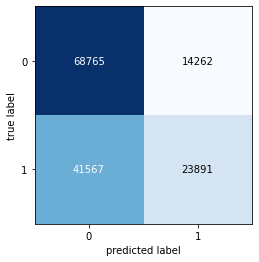

In [13]:

cm = confusion_matrix(y_test,y_predRFC)
plot_confusion_matrix(conf_mat=cm)
plt.show()

              precision    recall  f1-score   support

           0       0.63      0.85      0.72     83027
           1       0.66      0.37      0.48     65458

    accuracy                           0.64    148485
   macro avg       0.64      0.61      0.60    148485
weighted avg       0.64      0.64      0.61    148485



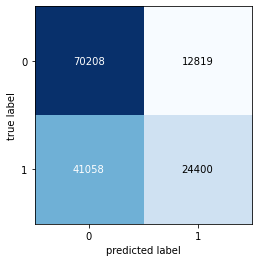

In [25]:
modelABC = AdaBoostClassifier(random_state=42)
modelABC.fit(X_train,y_train)
y_predABC = modelABC.predict(X_test)


In [ ]:
print(classification_report(y_test,y_predABC))
cm = confusion_matrix(y_test,y_predABC)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [18]:
from xgboost import XGBClassifier
modelXGBC = XGBClassifier(random_state = 42)
modelXGBC.fit(X_train,y_train)
y_predXGBC= modelXGBC.predict(X_test)


C:\Users\pedro\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:nm_age

              precision    recall  f1-score   support

           0       0.63      0.85      0.72     83027
           1       0.66      0.36      0.47     65458

    accuracy                           0.64    148485
   macro avg       0.65      0.61      0.60    148485
weighted avg       0.64      0.64      0.61    148485



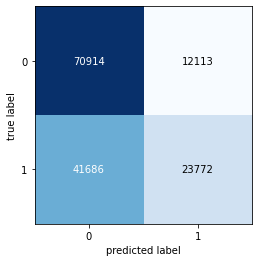

In [28]:
print(classification_report(y_test,y_predXGBC))
cm = confusion_matrix(y_test,y_predXGBC)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [30]:
%pip install lightgbm

In [167]:

df_tret_ND = df_tret.drop_duplicates()
Xnd = df_tret_ND.drop(['covid_res'],axis=1)
ynd = df_tret_ND['covid_res']
Xnd_train,Xnd_test,ynd_train,ynd_test = train_test_split(Xnd,ynd,test_size=.3,random_state=42,stratify=ynd)



In [69]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
model_LGB = lgb.LGBMClassifier(random_state = 42, n_jobs=3)
model_LGB.fit(X_train,y_train)
y_predLGB = model_LGB.predict(X_test)
print(recall_score(y_test,y_predLGB,average=None)[0])
print(roc_auc_score(y_test,y_predLGB))

0.8607320510195479
0.609419769895487


              precision    recall  f1-score   support

           0       0.63      0.86      0.73     83027
           1       0.67      0.36      0.47     65458

    accuracy                           0.64    148485
   macro avg       0.65      0.61      0.60    148485
weighted avg       0.65      0.64      0.61    148485



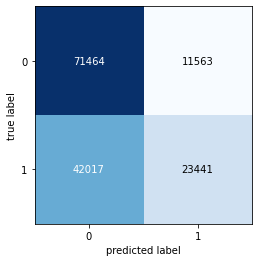

In [29]:
print(classification_report(y_test,y_predLGB))
cm = confusion_matrix(y_test,y_predLGB)
plot_confusion_matrix(conf_mat=cm)
plt.show()


              precision    recall  f1-score   support

           0       0.57      0.57      0.57      8742
           1       0.58      0.57      0.58      8973

    accuracy                           0.57     17715
   macro avg       0.57      0.57      0.57     17715
weighted avg       0.57      0.57      0.57     17715



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

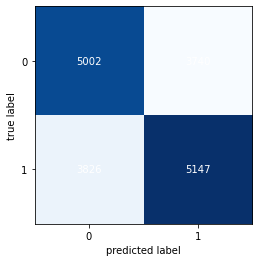

In [18]:
model_LGBnd = lgb.LGBMClassifier()
model_LGBnd.fit(Xnd_train,ynd_train)
ynd_predLGB = model_LGBnd.predict(Xnd_test)
print(classification_report(ynd_test,ynd_predLGB))
cm = confusion_matrix(ynd_test,ynd_predLGB)
plot_confusion_matrix(conf_mat=cm)


              precision    recall  f1-score   support

           0       0.62      0.83      0.71     83027
           1       0.63      0.36      0.46     65458

    accuracy                           0.62    148485
   macro avg       0.63      0.60      0.59    148485
weighted avg       0.63      0.62      0.60    148485



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

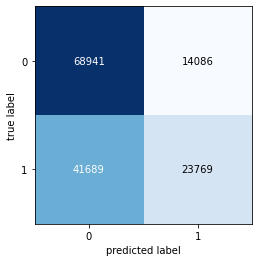

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)
model_GNB = GaussianNB()
model_GNB.fit(X_train_std,y_train)
y_predGNB = model_GNB.predict(X_test_std)
print(classification_report(y_test,y_predGNB))
cm = confusion_matrix(y_test,y_predGNB)
plot_confusion_matrix(conf_mat=cm)

              precision    recall  f1-score   support

           0       0.56      0.62      0.59      8742
           1       0.59      0.53      0.56      8973

    accuracy                           0.58     17715
   macro avg       0.58      0.58      0.58     17715
weighted avg       0.58      0.58      0.58     17715



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

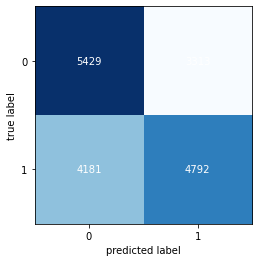

In [20]:
from sklearn.svm import SVC
model_svc = SVC()
Xnd_train_std = scl.fit_transform(Xnd_train)
Xnd_test_std = scl.transform(Xnd_test)
model_svc.fit(Xnd_train_std,ynd_train)
y_predSVC = model_svc.predict(Xnd_test_std)
print(classification_report(ynd_test,y_predSVC))
cm = confusion_matrix(ynd_test,y_predSVC)
plot_confusion_matrix(conf_mat=cm)

# Analise de primeiros resultado
## Melhores resultados foram para Naive Bayes e lightBM
Vamos rodar o optuna para lightBM em busca de um melhor f1_score para positivos
Estamos mais perto de melhorar, e podemos economizar kit de testes quanto mais perto estamos de achar que testará negativo

In [31]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [25]:
model_LGB.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [158]:
%%time
import optuna
import lightgbm as lgb
from sklearn.metrics import f1_score,precision_score
#import optuna.integration.lightgbm as lgb

# fonte do objective: https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258
# https://github.com/optuna/optuna-examples/blob/main/lightgbm/lightgbm_simple.py

def objective(trial):
 
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'n_jobs': 3,
        'verbosity': -1
    }

    X_trainN,X_testN,y_trainN,y_testN = train_test_split(X,y,test_size=0.33,stratify=y)
    
    gbm = lgb.LGBMClassifier(**param)
    #dtrain = lgb.Dataset(X_train,label=y_train)
    gbm.fit(X_trainN,y_trainN)
    #gbm = lgb.train(param,dtrain)
    preds = gbm.predict(X_testN)
    #pred_labels = np.rint(preds)
    #accuracy = accuracy_score(y_testN,preds)
    accuracy = f1_score(y_testN,preds,average=None)[1]
    return accuracy
 
study = optuna.create_study(direction='maximize',study_name='Covid f1-score positive')
study.optimize(objective, n_trials=30)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-03-13 06:03:59,446] A new study created in memory with name: Covid f1-score positive


[LightGBM] [Warning] feature_fraction is set=0.9193316480630883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9193316480630883
[LightGBM] [Warning] lambda_l1 is set=0.008686756832325596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008686756832325596
[LightGBM] [Warning] bagging_fraction is set=0.9368841658263701, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9368841658263701
[LightGBM] [Warning] lambda_l2 is set=2.6232354356136356e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6232354356136356e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-03-13 06:04:03,423] Trial 0 finished with value: 0.46932427086704787 and parameters: {'lambda_l1': 0.008686756832325596, 'lambda_l2': 2.6232354356136356e-08, 'num_leaves': 75, 'feature_fraction': 0.9193316480630883, 'bagging_fraction': 0.9368841658263701, 'bagging_freq': 5, 'min_child_samples': 8}. Best is trial 0 with value: 0.46932427086704787.


[LightGBM] [Warning] feature_fraction is set=0.7059987172898979, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7059987172898979
[LightGBM] [Warning] lambda_l1 is set=0.04457178132974869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04457178132974869
[LightGBM] [Warning] bagging_fraction is set=0.47838102582457476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47838102582457476
[LightGBM] [Warning] lambda_l2 is set=1.3664338199471899e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3664338199471899e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-03-13 06:04:08,856] Trial 1 finished with value: 0.4714853399205241 and parameters: {'lambda_l1': 0.04457178132974869, 'lambda_l2': 1.3664338199471899e-06, 'num_leaves': 236, 'feature_fraction': 0.7059987172898979, 'bagging_fraction': 0.47838102582457476, 'bagging_freq': 1, 'min_child_samples': 21}. Best is trial 1 with value: 0.4714853399205241.


[LightGBM] [Warning] feature_fraction is set=0.9390994032420978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9390994032420978
[LightGBM] [Warning] lambda_l1 is set=4.901797755821938, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.901797755821938
[LightGBM] [Warning] bagging_fraction is set=0.5594325481222701, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5594325481222701
[LightGBM] [Warning] lambda_l2 is set=1.211275375477782e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.211275375477782e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-03-13 06:04:13,192] Trial 2 finished with value: 0.47195948661611425 and parameters: {'lambda_l1': 4.901797755821938, 'lambda_l2': 1.211275375477782e-08, 'num_leaves': 155, 'feature_fraction': 0.9390994032420978, 'bagging_fraction': 0.5594325481222701, 'bagging_freq': 1, 'min_child_samples': 24}. Best is trial 2 with value: 0.47195948661611425.


[LightGBM] [Warning] feature_fraction is set=0.4946079297560947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4946079297560947
[LightGBM] [Warning] lambda_l1 is set=2.7094840105011973e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7094840105011973e-06
[LightGBM] [Warning] bagging_fraction is set=0.7158624582344912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7158624582344912
[LightGBM] [Warning] lambda_l2 is set=9.37729004212702, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.37729004212702
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-03-13 06:04:17,223] Trial 3 finished with value: 0.46932355426126665 and parameters: {'lambda_l1': 2.7094840105011973e-06, 'lambda_l2': 9.37729004212702, 'num_leaves': 211, 'feature_fraction': 0.4946079297560947, 'bagging_fraction': 0.7158624582344912, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 2 with value: 0.47195948661611425.


[LightGBM] [Warning] feature_fraction is set=0.704190715245304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.704190715245304
[LightGBM] [Warning] lambda_l1 is set=1.3006837288348153e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3006837288348153e-08
[LightGBM] [Warning] bagging_fraction is set=0.7612699730442705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7612699730442705
[LightGBM] [Warning] lambda_l2 is set=0.00011533789137486933, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011533789137486933
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 06:04:21,536] Trial 4 finished with value: 0.4636513425917543 and parameters: {'lambda_l1': 1.3006837288348153e-08, 'lambda_l2': 0.00011533789137486933, 'num_leaves': 127, 'feature_fraction': 0.704190715245304, 'bagging_fraction': 0.7612699730442705, 'bagging_freq': 4, 'min_child_samples': 33}. Best is trial 2 with value: 0.47195948661611425.


[LightGBM] [Warning] feature_fraction is set=0.5907971289490719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5907971289490719
[LightGBM] [Warning] lambda_l1 is set=0.00015283133310075057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015283133310075057
[LightGBM] [Warning] bagging_fraction is set=0.7634341937440007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7634341937440007
[LightGBM] [Warning] lambda_l2 is set=0.020694701489039374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020694701489039374
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 06:04:25,084] Trial 5 finished with value: 0.4691451694486596 and parameters: {'lambda_l1': 0.00015283133310075057, 'lambda_l2': 0.020694701489039374, 'num_leaves': 33, 'feature_fraction': 0.5907971289490719, 'bagging_fraction': 0.7634341937440007, 'bagging_freq': 4, 'min_child_samples': 80}. Best is trial 2 with value: 0.47195948661611425.


[LightGBM] [Warning] feature_fraction is set=0.8919683527880834, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8919683527880834
[LightGBM] [Warning] lambda_l1 is set=5.676618590642396e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.676618590642396e-07
[LightGBM] [Warning] bagging_fraction is set=0.4269201109373831, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4269201109373831
[LightGBM] [Warning] lambda_l2 is set=0.22040737791107132, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22040737791107132
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-03-13 06:04:29,925] Trial 6 finished with value: 0.4709049235088218 and parameters: {'lambda_l1': 5.676618590642396e-07, 'lambda_l2': 0.22040737791107132, 'num_leaves': 171, 'feature_fraction': 0.8919683527880834, 'bagging_fraction': 0.4269201109373831, 'bagging_freq': 6, 'min_child_samples': 80}. Best is trial 2 with value: 0.47195948661611425.


[LightGBM] [Warning] feature_fraction is set=0.5432805112423682, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5432805112423682
[LightGBM] [Warning] lambda_l1 is set=2.9051960482851344e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9051960482851344e-06
[LightGBM] [Warning] bagging_fraction is set=0.5227165832891989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5227165832891989
[LightGBM] [Warning] lambda_l2 is set=1.6265616133100717e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6265616133100717e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 06:04:35,677] Trial 7 finished with value: 0.4719019017234926 and parameters: {'lambda_l1': 2.9051960482851344e-06, 'lambda_l2': 1.6265616133100717e-08, 'num_leaves': 234, 'feature_fraction': 0.5432805112423682, 'bagging_fraction': 0.5227165832891989, 'bagging_freq': 2, 'min_child_samples': 75}. Best is trial 2 with value: 0.47195948661611425.


[LightGBM] [Warning] feature_fraction is set=0.9027169658245215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9027169658245215
[LightGBM] [Warning] lambda_l1 is set=1.1529385790185071e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1529385790185071e-06
[LightGBM] [Warning] bagging_fraction is set=0.8848500777970345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8848500777970345
[LightGBM] [Warning] lambda_l2 is set=1.0255870228156833e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0255870228156833e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:04:43,249] Trial 8 finished with value: 0.47409156267196856 and parameters: {'lambda_l1': 1.1529385790185071e-06, 'lambda_l2': 1.0255870228156833e-05, 'num_leaves': 146, 'feature_fraction': 0.9027169658245215, 'bagging_fraction': 0.8848500777970345, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.6873504319151895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6873504319151895
[LightGBM] [Warning] lambda_l1 is set=6.445960703858579, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.445960703858579
[LightGBM] [Warning] bagging_fraction is set=0.7031334146741361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7031334146741361
[LightGBM] [Warning] lambda_l2 is set=7.395433475017566e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.395433475017566e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-03-13 06:04:47,968] Trial 9 finished with value: 0.4675052410901467 and parameters: {'lambda_l1': 6.445960703858579, 'lambda_l2': 7.395433475017566e-05, 'num_leaves': 33, 'feature_fraction': 0.6873504319151895, 'bagging_fraction': 0.7031334146741361, 'bagging_freq': 6, 'min_child_samples': 7}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.8236212392447881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8236212392447881
[LightGBM] [Warning] lambda_l1 is set=2.8511109035469635e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8511109035469635e-08
[LightGBM] [Warning] bagging_fraction is set=0.9920139728472807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9920139728472807
[LightGBM] [Warning] lambda_l2 is set=2.6865562385860614e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6865562385860614e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:04:53,216] Trial 10 finished with value: 0.46605174353205847 and parameters: {'lambda_l1': 2.8511109035469635e-08, 'lambda_l2': 2.6865562385860614e-06, 'num_leaves': 106, 'feature_fraction': 0.8236212392447881, 'bagging_fraction': 0.9920139728472807, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.9727549868388039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9727549868388039
[LightGBM] [Warning] lambda_l1 is set=0.00022462926580503302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022462926580503302
[LightGBM] [Warning] bagging_fraction is set=0.5756138576352217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5756138576352217
[LightGBM] [Warning] lambda_l2 is set=4.4225482752095943e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4225482752095943e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 06:04:59,770] Trial 11 finished with value: 0.47249288762446656 and parameters: {'lambda_l1': 0.00022462926580503302, 'lambda_l2': 4.4225482752095943e-07, 'num_leaves': 176, 'feature_fraction': 0.9727549868388039, 'bagging_fraction': 0.5756138576352217, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.9977697012208016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9977697012208016
[LightGBM] [Warning] lambda_l1 is set=0.00010756249077450618, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010756249077450618
[LightGBM] [Warning] bagging_fraction is set=0.8586655887802228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8586655887802228
[LightGBM] [Warning] lambda_l2 is set=2.273634120432709e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.273634120432709e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:05:05,457] Trial 12 finished with value: 0.4683397787328733 and parameters: {'lambda_l1': 0.00010756249077450618, 'lambda_l2': 2.273634120432709e-06, 'num_leaves': 191, 'feature_fraction': 0.9977697012208016, 'bagging_fraction': 0.8586655887802228, 'bagging_freq': 3, 'min_child_samples': 58}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.7859247901634225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7859247901634225
[LightGBM] [Warning] lambda_l1 is set=0.004777804009829198, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004777804009829198
[LightGBM] [Warning] bagging_fraction is set=0.5976747345472462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5976747345472462
[LightGBM] [Warning] lambda_l2 is set=0.00274987769981965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00274987769981965
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:05:10,466] Trial 13 finished with value: 0.4718742719925452 and parameters: {'lambda_l1': 0.004777804009829198, 'lambda_l2': 0.00274987769981965, 'num_leaves': 150, 'feature_fraction': 0.7859247901634225, 'bagging_fraction': 0.5976747345472462, 'bagging_freq': 3, 'min_child_samples': 61}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.40143293917313755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40143293917313755
[LightGBM] [Warning] lambda_l1 is set=1.0450205339371124e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0450205339371124e-05
[LightGBM] [Warning] bagging_fraction is set=0.6323041870660173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6323041870660173
[LightGBM] [Warning] lambda_l2 is set=4.6727667393937647e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6727667393937647e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 06:05:15,178] Trial 14 finished with value: 0.46951378464138366 and parameters: {'lambda_l1': 1.0450205339371124e-05, 'lambda_l2': 4.6727667393937647e-07, 'num_leaves': 102, 'feature_fraction': 0.40143293917313755, 'bagging_fraction': 0.6323041870660173, 'bagging_freq': 2, 'min_child_samples': 96}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.9941063268005218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9941063268005218
[LightGBM] [Warning] lambda_l1 is set=3.9863115277422344e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9863115277422344e-07
[LightGBM] [Warning] bagging_fraction is set=0.8716668192660721, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8716668192660721
[LightGBM] [Warning] lambda_l2 is set=0.0001351247378600694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001351247378600694
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 06:05:22,674] Trial 15 finished with value: 0.46797117855281833 and parameters: {'lambda_l1': 3.9863115277422344e-07, 'lambda_l2': 0.0001351247378600694, 'num_leaves': 197, 'feature_fraction': 0.9941063268005218, 'bagging_fraction': 0.8716668192660721, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.8257563786599663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8257563786599663
[LightGBM] [Warning] lambda_l1 is set=3.4108667403531155e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4108667403531155e-05
[LightGBM] [Warning] bagging_fraction is set=0.8367379118646964, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8367379118646964
[LightGBM] [Warning] lambda_l2 is set=1.4782626668767217e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4782626668767217e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-03-13 06:05:27,540] Trial 16 finished with value: 0.4661964717341896 and parameters: {'lambda_l1': 3.4108667403531155e-05, 'lambda_l2': 1.4782626668767217e-05, 'num_leaves': 68, 'feature_fraction': 0.8257563786599663, 'bagging_fraction': 0.8367379118646964, 'bagging_freq': 7, 'min_child_samples': 68}. Best is trial 8 with value: 0.47409156267196856.


[LightGBM] [Warning] feature_fraction is set=0.889550776605072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.889550776605072
[LightGBM] [Warning] lambda_l1 is set=0.0008685389213880999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008685389213880999
[LightGBM] [Warning] bagging_fraction is set=0.6439691976227873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6439691976227873
[LightGBM] [Warning] lambda_l2 is set=2.0737599489155993e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0737599489155993e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:05:33,191] Trial 17 finished with value: 0.474597854635173 and parameters: {'lambda_l1': 0.0008685389213880999, 'lambda_l2': 2.0737599489155993e-07, 'num_leaves': 132, 'feature_fraction': 0.889550776605072, 'bagging_fraction': 0.6439691976227873, 'bagging_freq': 3, 'min_child_samples': 91}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.8544034062661389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8544034062661389
[LightGBM] [Warning] lambda_l1 is set=0.15919550811881406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15919550811881406
[LightGBM] [Warning] bagging_fraction is set=0.7980162299746716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7980162299746716
[LightGBM] [Warning] lambda_l2 is set=1.7541675401914583e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7541675401914583e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-03-13 06:05:39,232] Trial 18 finished with value: 0.4689041476057044 and parameters: {'lambda_l1': 0.15919550811881406, 'lambda_l2': 1.7541675401914583e-07, 'num_leaves': 128, 'feature_fraction': 0.8544034062661389, 'bagging_fraction': 0.7980162299746716, 'bagging_freq': 5, 'min_child_samples': 90}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.7605097739151297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7605097739151297
[LightGBM] [Warning] lambda_l1 is set=0.0037100937491255765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037100937491255765
[LightGBM] [Warning] bagging_fraction is set=0.6362773277520383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6362773277520383
[LightGBM] [Warning] lambda_l2 is set=0.005310202952558191, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005310202952558191
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:05:41,982] Trial 19 finished with value: 0.4645703521228807 and parameters: {'lambda_l1': 0.0037100937491255765, 'lambda_l2': 0.005310202952558191, 'num_leaves': 5, 'feature_fraction': 0.7605097739151297, 'bagging_fraction': 0.6362773277520383, 'bagging_freq': 3, 'min_child_samples': 86}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.8821320683894227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8821320683894227
[LightGBM] [Warning] lambda_l1 is set=1.5349533808470583e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5349533808470583e-07
[LightGBM] [Warning] bagging_fraction is set=0.9573769802255757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9573769802255757
[LightGBM] [Warning] lambda_l2 is set=8.305867186694723e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.305867186694723e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-03-13 06:05:47,021] Trial 20 finished with value: 0.46800760783750817 and parameters: {'lambda_l1': 1.5349533808470583e-07, 'lambda_l2': 8.305867186694723e-06, 'num_leaves': 97, 'feature_fraction': 0.8821320683894227, 'bagging_fraction': 0.9573769802255757, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.9419899467176565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9419899467176565
[LightGBM] [Warning] lambda_l1 is set=0.000493382460478079, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000493382460478079
[LightGBM] [Warning] bagging_fraction is set=0.6373220766640111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6373220766640111
[LightGBM] [Warning] lambda_l2 is set=1.241357664251158e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.241357664251158e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 06:05:52,798] Trial 21 finished with value: 0.46822003449267036 and parameters: {'lambda_l1': 0.000493382460478079, 'lambda_l2': 1.241357664251158e-07, 'num_leaves': 166, 'feature_fraction': 0.9419899467176565, 'bagging_fraction': 0.6373220766640111, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.9600720281102941, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9600720281102941
[LightGBM] [Warning] lambda_l1 is set=0.0007392580657954696, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007392580657954696
[LightGBM] [Warning] bagging_fraction is set=0.5552867016985373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5552867016985373
[LightGBM] [Warning] lambda_l2 is set=2.0687720569727452e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0687720569727452e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:05:58,587] Trial 22 finished with value: 0.473906083244397 and parameters: {'lambda_l1': 0.0007392580657954696, 'lambda_l2': 2.0687720569727452e-05, 'num_leaves': 142, 'feature_fraction': 0.9600720281102941, 'bagging_fraction': 0.5552867016985373, 'bagging_freq': 3, 'min_child_samples': 90}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.7762136361924116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7762136361924116
[LightGBM] [Warning] lambda_l1 is set=0.0010220927703935019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010220927703935019
[LightGBM] [Warning] bagging_fraction is set=0.4985479385986048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4985479385986048
[LightGBM] [Warning] lambda_l2 is set=2.0801719293965955e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0801719293965955e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 06:06:04,320] Trial 23 finished with value: 0.4725593996755967 and parameters: {'lambda_l1': 0.0010220927703935019, 'lambda_l2': 2.0801719293965955e-05, 'num_leaves': 138, 'feature_fraction': 0.7762136361924116, 'bagging_fraction': 0.4985479385986048, 'bagging_freq': 4, 'min_child_samples': 90}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.8707664494969897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8707664494969897
[LightGBM] [Warning] lambda_l1 is set=0.10143087956990977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10143087956990977
[LightGBM] [Warning] bagging_fraction is set=0.6890174940049071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6890174940049071
[LightGBM] [Warning] lambda_l2 is set=0.0006959634194083961, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006959634194083961
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:06:10,823] Trial 24 finished with value: 0.4705273489783171 and parameters: {'lambda_l1': 0.10143087956990977, 'lambda_l2': 0.0006959634194083961, 'num_leaves': 122, 'feature_fraction': 0.8707664494969897, 'bagging_fraction': 0.6890174940049071, 'bagging_freq': 3, 'min_child_samples': 83}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.922820333176761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.922820333176761
[LightGBM] [Warning] lambda_l1 is set=9.854388177128942e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.854388177128942e-06
[LightGBM] [Warning] bagging_fraction is set=0.4123536607110748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4123536607110748
[LightGBM] [Warning] lambda_l2 is set=2.385280057186762e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.385280057186762e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 06:06:15,660] Trial 25 finished with value: 0.4711930666999884 and parameters: {'lambda_l1': 9.854388177128942e-06, 'lambda_l2': 2.385280057186762e-05, 'num_leaves': 77, 'feature_fraction': 0.922820333176761, 'bagging_fraction': 0.4123536607110748, 'bagging_freq': 4, 'min_child_samples': 93}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.8313802466674364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8313802466674364
[LightGBM] [Warning] lambda_l1 is set=0.0014295641833136077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014295641833136077
[LightGBM] [Warning] bagging_fraction is set=0.9054673493064574, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9054673493064574
[LightGBM] [Warning] lambda_l2 is set=7.214326450740139e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.214326450740139e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 06:06:21,354] Trial 26 finished with value: 0.47335618019425757 and parameters: {'lambda_l1': 0.0014295641833136077, 'lambda_l2': 7.214326450740139e-08, 'num_leaves': 144, 'feature_fraction': 0.8313802466674364, 'bagging_fraction': 0.9054673493064574, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.9618109867804894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9618109867804894
[LightGBM] [Warning] lambda_l1 is set=0.028356756044570764, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028356756044570764
[LightGBM] [Warning] bagging_fraction is set=0.5387296102523427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5387296102523427
[LightGBM] [Warning] lambda_l2 is set=0.0004859040640744309, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004859040640744309
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:06:29,396] Trial 27 finished with value: 0.47196631863779187 and parameters: {'lambda_l1': 0.028356756044570764, 'lambda_l2': 0.0004859040640744309, 'num_leaves': 206, 'feature_fraction': 0.9618109867804894, 'bagging_fraction': 0.5387296102523427, 'bagging_freq': 3, 'min_child_samples': 99}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.6412943149547498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6412943149547498
[LightGBM] [Warning] lambda_l1 is set=3.6859939911967356e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6859939911967356e-05
[LightGBM] [Warning] bagging_fraction is set=0.6707519697351145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6707519697351145
[LightGBM] [Warning] lambda_l2 is set=5.964690890511976e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.964690890511976e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 06:06:35,271] Trial 28 finished with value: 0.46919460984017547 and parameters: {'lambda_l1': 3.6859939911967356e-05, 'lambda_l2': 5.964690890511976e-06, 'num_leaves': 115, 'feature_fraction': 0.6412943149547498, 'bagging_fraction': 0.6707519697351145, 'bagging_freq': 3, 'min_child_samples': 64}. Best is trial 17 with value: 0.474597854635173.


[LightGBM] [Warning] feature_fraction is set=0.9071123567934918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071123567934918
[LightGBM] [Warning] lambda_l1 is set=0.40637801704578386, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40637801704578386
[LightGBM] [Warning] bagging_fraction is set=0.4603747137066937, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4603747137066937
[LightGBM] [Warning] lambda_l2 is set=8.765060331916177e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.765060331916177e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-03-13 06:06:40,687] Trial 29 finished with value: 0.4703819416628838 and parameters: {'lambda_l1': 0.40637801704578386, 'lambda_l2': 8.765060331916177e-07, 'num_leaves': 82, 'feature_fraction': 0.9071123567934918, 'bagging_fraction': 0.4603747137066937, 'bagging_freq': 5, 'min_child_samples': 88}. Best is trial 17 with value: 0.474597854635173.


Number of finished trials: 30
Best trial: {'lambda_l1': 0.0008685389213880999, 'lambda_l2': 2.0737599489155993e-07, 'num_leaves': 132, 'feature_fraction': 0.889550776605072, 'bagging_fraction': 0.6439691976227873, 'bagging_freq': 3, 'min_child_samples': 91}
Wall time: 2min 41s


[LightGBM] [Warning] feature_fraction is set=0.889550776605072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.889550776605072
[LightGBM] [Warning] lambda_l1 is set=0.0008685389213880999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008685389213880999
[LightGBM] [Warning] bagging_fraction is set=0.6439691976227873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6439691976227873
[LightGBM] [Warning] lambda_l2 is set=2.0737599489155993e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0737599489155993e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
              precision    recall  f1-score   support

           0       0.63      0.85      0.72     83027
           1       0.66      0.37      0.47     65458

    accuracy                           0.64    148485
   macro avg       0.64      0.61      0.60    148485
weighted avg       0.64      0.64      0

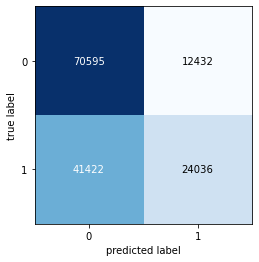

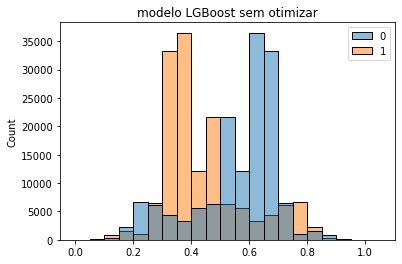

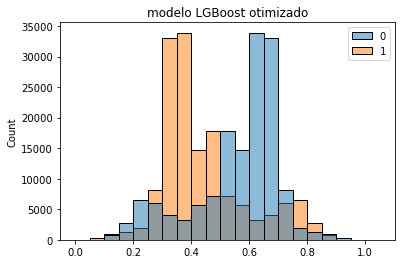

In [161]:
bins = np.arange(0,1.1,0.05)
params = study.best_params
model_LGBOPT = lgb.sklearn.LGBMClassifier(**params)
model_LGBOPT.fit(X_train,y_train)
y_predLGBOPT = model_LGBOPT.predict(X_test)
print(classification_report(y_test,y_predLGBOPT))
cm = confusion_matrix(y_test,y_predLGBOPT)
plot_confusion_matrix(conf_mat=cm)
plt.show()
plt.title('modelo LGBoost sem otimizar')
sns.histplot(pd.DataFrame(model_LGB.predict_proba(X_test)),bins=bins)
plt.show()
plt.title('modelo LGBoost otimizado')
sns.histplot(pd.DataFrame(model_LGBOPT.predict_proba(X_test)),bins=bins)
plt.show()


# Analise do umbral para negativo. 
Pelos gráficos de probabilidade pode se identiifcar uma maior acertividade para o negátivo, que para o positivo, então decidi
rodar o autotunning, só que agora considerando também como hiper parâmetro, o threshold para considerar 0 (ou 1), e calibrando pelo melhor desempenho de f1_score positivo.

In [205]:
%%time

# fonte do objective: https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258
# https://github.com/optuna/optuna-examples/blob/main/lightgbm/lightgbm_simple.py

def objective(trial):
 
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'n_jobs': 3,
        'verbosity': -1
    }
    threshold = trial.suggest_uniform('threshold_cut',0.2,0.67)
    cond = lambda x:(0 if x>threshold else 1) #condição de para threshold de 0

    X_trainN,X_testN,y_trainN,y_testN = train_test_split(X,y,test_size=0.33,stratify=y)
    
    gbm = lgb.LGBMClassifier(**param)
    #dtrain = lgb.Dataset(X_train,label=y_train)
    gbm.fit(X_trainN,y_trainN)
    #gbm = lgb.train(param,dtrain)
    isCovid = pd.Series(gbm.predict_proba(X_testN)[:,0])
    preds = isCovid.map(cond)
    # preds = gbm.predict(X_testN)
    #pred_labels = np.rint(preds)
    #accuracy = accuracy_score(y_testN,preds)
    accuracy = f1_score(y_testN,preds,average=None)[1]
    return accuracy
 
study = optuna.create_study(direction='maximize',study_name='Covid f1-score positive')
study.optimize(objective, n_trials=15)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-03-13 07:19:44,096] A new study created in memory with name: Covid f1-score positive


[LightGBM] [Warning] feature_fraction is set=0.5106072767035272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5106072767035272
[LightGBM] [Warning] lambda_l1 is set=1.2210845021776935e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2210845021776935e-06
[LightGBM] [Warning] bagging_fraction is set=0.5057325187793432, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5057325187793432
[LightGBM] [Warning] lambda_l2 is set=0.0015647828510400351, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015647828510400351
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-03-13 07:19:47,381] Trial 0 finished with value: 0.576561369664818 and parameters: {'lambda_l1': 1.2210845021776935e-06, 'lambda_l2': 0.0015647828510400351, 'num_leaves': 7, 'feature_fraction': 0.5106072767035272, 'bagging_fraction': 0.5057325187793432, 'bagging_freq': 1, 'min_child_samples': 16, 'threshold_cut': 0.5945125217277623}. Best is trial 0 with value: 0.576561369664818.


[LightGBM] [Warning] feature_fraction is set=0.6570167560033076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6570167560033076
[LightGBM] [Warning] lambda_l1 is set=1.2145986344797157e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2145986344797157e-06
[LightGBM] [Warning] bagging_fraction is set=0.41618002152218353, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41618002152218353
[LightGBM] [Warning] lambda_l2 is set=5.391161574811818e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.391161574811818e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-03-13 07:19:52,928] Trial 1 finished with value: 0.45359773896121947 and parameters: {'lambda_l1': 1.2145986344797157e-06, 'lambda_l2': 5.391161574811818e-07, 'num_leaves': 216, 'feature_fraction': 0.6570167560033076, 'bagging_fraction': 0.41618002152218353, 'bagging_freq': 5, 'min_child_samples': 67, 'threshold_cut': 0.4754695439660657}. Best is trial 0 with value: 0.576561369664818.


[LightGBM] [Warning] feature_fraction is set=0.7274222247485496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7274222247485496
[LightGBM] [Warning] lambda_l1 is set=3.6538706582520693e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6538706582520693e-07
[LightGBM] [Warning] bagging_fraction is set=0.5438258322632408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5438258322632408
[LightGBM] [Warning] lambda_l2 is set=0.0002733471251207468, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002733471251207468
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 07:19:58,027] Trial 2 finished with value: 0.20718688556229717 and parameters: {'lambda_l1': 3.6538706582520693e-07, 'lambda_l2': 0.0002733471251207468, 'num_leaves': 51, 'feature_fraction': 0.7274222247485496, 'bagging_fraction': 0.5438258322632408, 'bagging_freq': 4, 'min_child_samples': 67, 'threshold_cut': 0.2532304444477065}. Best is trial 0 with value: 0.576561369664818.


[LightGBM] [Warning] feature_fraction is set=0.5800006160656118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5800006160656118
[LightGBM] [Warning] lambda_l1 is set=1.2524645677575937e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2524645677575937e-06
[LightGBM] [Warning] bagging_fraction is set=0.6703193216889622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6703193216889622
[LightGBM] [Warning] lambda_l2 is set=0.13641079198237618, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13641079198237618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 07:20:04,108] Trial 3 finished with value: 0.49716794470061737 and parameters: {'lambda_l1': 1.2524645677575937e-06, 'lambda_l2': 0.13641079198237618, 'num_leaves': 58, 'feature_fraction': 0.5800006160656118, 'bagging_fraction': 0.6703193216889622, 'bagging_freq': 3, 'min_child_samples': 44, 'threshold_cut': 0.5267386272907955}. Best is trial 0 with value: 0.576561369664818.


[LightGBM] [Warning] feature_fraction is set=0.606257785766545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.606257785766545
[LightGBM] [Warning] lambda_l1 is set=2.430169882104425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.430169882104425
[LightGBM] [Warning] bagging_fraction is set=0.6308845527976488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6308845527976488
[LightGBM] [Warning] lambda_l2 is set=0.05668816104807315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05668816104807315
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-03-13 07:20:10,542] Trial 4 finished with value: 0.3385422264256389 and parameters: {'lambda_l1': 2.430169882104425, 'lambda_l2': 0.05668816104807315, 'num_leaves': 189, 'feature_fraction': 0.606257785766545, 'bagging_fraction': 0.6308845527976488, 'bagging_freq': 6, 'min_child_samples': 34, 'threshold_cut': 0.3450562959400277}. Best is trial 0 with value: 0.576561369664818.


[LightGBM] [Warning] feature_fraction is set=0.461156276152882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.461156276152882
[LightGBM] [Warning] lambda_l1 is set=0.0006696036230961067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006696036230961067
[LightGBM] [Warning] bagging_fraction is set=0.7309894541969231, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7309894541969231
[LightGBM] [Warning] lambda_l2 is set=6.303533465133272e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.303533465133272e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 07:20:17,043] Trial 5 finished with value: 0.3973480662983426 and parameters: {'lambda_l1': 0.0006696036230961067, 'lambda_l2': 6.303533465133272e-06, 'num_leaves': 143, 'feature_fraction': 0.461156276152882, 'bagging_fraction': 0.7309894541969231, 'bagging_freq': 4, 'min_child_samples': 48, 'threshold_cut': 0.4165087748925891}. Best is trial 0 with value: 0.576561369664818.


[LightGBM] [Warning] feature_fraction is set=0.7528621058493807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7528621058493807
[LightGBM] [Warning] lambda_l1 is set=0.04290940817786757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04290940817786757
[LightGBM] [Warning] bagging_fraction is set=0.9016029433488707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9016029433488707
[LightGBM] [Warning] lambda_l2 is set=1.517867396037441e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.517867396037441e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-03-13 07:20:21,133] Trial 6 finished with value: 0.5864783099169316 and parameters: {'lambda_l1': 0.04290940817786757, 'lambda_l2': 1.517867396037441e-05, 'num_leaves': 13, 'feature_fraction': 0.7528621058493807, 'bagging_fraction': 0.9016029433488707, 'bagging_freq': 4, 'min_child_samples': 97, 'threshold_cut': 0.6122221198182125}. Best is trial 6 with value: 0.5864783099169316.


[LightGBM] [Warning] feature_fraction is set=0.8005357418522525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8005357418522525
[LightGBM] [Warning] lambda_l1 is set=4.641595539357468e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.641595539357468e-06
[LightGBM] [Warning] bagging_fraction is set=0.5188737682278365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5188737682278365
[LightGBM] [Warning] lambda_l2 is set=1.966965686707946e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.966965686707946e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-03-13 07:20:27,373] Trial 7 finished with value: 0.48381789221263416 and parameters: {'lambda_l1': 4.641595539357468e-06, 'lambda_l2': 1.966965686707946e-06, 'num_leaves': 100, 'feature_fraction': 0.8005357418522525, 'bagging_fraction': 0.5188737682278365, 'bagging_freq': 7, 'min_child_samples': 44, 'threshold_cut': 0.5123754622039325}. Best is trial 6 with value: 0.5864783099169316.


[LightGBM] [Warning] feature_fraction is set=0.9747107020014346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9747107020014346
[LightGBM] [Warning] lambda_l1 is set=0.004121675163735395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004121675163735395
[LightGBM] [Warning] bagging_fraction is set=0.61030920218093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.61030920218093
[LightGBM] [Warning] lambda_l2 is set=1.450366449900912e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.450366449900912e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-03-13 07:20:34,796] Trial 8 finished with value: 0.41640686844599945 and parameters: {'lambda_l1': 0.004121675163735395, 'lambda_l2': 1.450366449900912e-05, 'num_leaves': 155, 'feature_fraction': 0.9747107020014346, 'bagging_fraction': 0.61030920218093, 'bagging_freq': 3, 'min_child_samples': 91, 'threshold_cut': 0.4338664127326907}. Best is trial 6 with value: 0.5864783099169316.


[LightGBM] [Warning] feature_fraction is set=0.9060550486487653, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9060550486487653
[LightGBM] [Warning] lambda_l1 is set=9.066472366328186e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.066472366328186e-07
[LightGBM] [Warning] bagging_fraction is set=0.97613607103321, subsample=1.0 will be ignored. Current value: bagging_fraction=0.97613607103321
[LightGBM] [Warning] lambda_l2 is set=1.9702823322318474e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9702823322318474e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-03-13 07:20:39,705] Trial 9 finished with value: 0.5392362471480261 and parameters: {'lambda_l1': 9.066472366328186e-07, 'lambda_l2': 1.9702823322318474e-08, 'num_leaves': 19, 'feature_fraction': 0.9060550486487653, 'bagging_fraction': 0.97613607103321, 'bagging_freq': 5, 'min_child_samples': 9, 'threshold_cut': 0.5462675922608726}. Best is trial 6 with value: 0.5864783099169316.


[LightGBM] [Warning] feature_fraction is set=0.81184090617156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.81184090617156
[LightGBM] [Warning] lambda_l1 is set=0.15109890533400394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15109890533400394
[LightGBM] [Warning] bagging_fraction is set=0.9170040044881416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9170040044881416
[LightGBM] [Warning] lambda_l2 is set=7.66280808125916, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.66280808125916
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 07:20:49,015] Trial 10 finished with value: 0.6138501585010696 and parameters: {'lambda_l1': 0.15109890533400394, 'lambda_l2': 7.66280808125916, 'num_leaves': 251, 'feature_fraction': 0.81184090617156, 'bagging_fraction': 0.9170040044881416, 'bagging_freq': 2, 'min_child_samples': 93, 'threshold_cut': 0.6617157215128563}. Best is trial 10 with value: 0.6138501585010696.


[LightGBM] [Warning] feature_fraction is set=0.8238477524193139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8238477524193139
[LightGBM] [Warning] lambda_l1 is set=0.19117109716058175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19117109716058175
[LightGBM] [Warning] bagging_fraction is set=0.9309487008805314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9309487008805314
[LightGBM] [Warning] lambda_l2 is set=2.764896821614406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.764896821614406
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-03-13 07:20:59,881] Trial 11 finished with value: 0.6136069360569303 and parameters: {'lambda_l1': 0.19117109716058175, 'lambda_l2': 2.764896821614406, 'num_leaves': 252, 'feature_fraction': 0.8238477524193139, 'bagging_fraction': 0.9309487008805314, 'bagging_freq': 1, 'min_child_samples': 99, 'threshold_cut': 0.6653246612909844}. Best is trial 10 with value: 0.6138501585010696.


[LightGBM] [Warning] feature_fraction is set=0.8444302840920185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8444302840920185
[LightGBM] [Warning] lambda_l1 is set=5.072422879280177, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.072422879280177
[LightGBM] [Warning] bagging_fraction is set=0.8160733262905459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8160733262905459
[LightGBM] [Warning] lambda_l2 is set=9.541615076068256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.541615076068256
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-03-13 07:21:07,172] Trial 12 finished with value: 0.614690046824715 and parameters: {'lambda_l1': 5.072422879280177, 'lambda_l2': 9.541615076068256, 'num_leaves': 251, 'feature_fraction': 0.8444302840920185, 'bagging_fraction': 0.8160733262905459, 'bagging_freq': 1, 'min_child_samples': 81, 'threshold_cut': 0.6655744842983298}. Best is trial 12 with value: 0.614690046824715.


[LightGBM] [Warning] feature_fraction is set=0.8789649576560046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8789649576560046
[LightGBM] [Warning] lambda_l1 is set=8.206058401404318, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.206058401404318
[LightGBM] [Warning] bagging_fraction is set=0.7987918799010573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7987918799010573
[LightGBM] [Warning] lambda_l2 is set=5.649981874484273, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.649981874484273
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 07:21:14,538] Trial 13 finished with value: 0.6105999303924127 and parameters: {'lambda_l1': 8.206058401404318, 'lambda_l2': 5.649981874484273, 'num_leaves': 236, 'feature_fraction': 0.8789649576560046, 'bagging_fraction': 0.7987918799010573, 'bagging_freq': 2, 'min_child_samples': 78, 'threshold_cut': 0.6500292769415781}. Best is trial 12 with value: 0.614690046824715.


[LightGBM] [Warning] feature_fraction is set=0.9977939562822683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9977939562822683
[LightGBM] [Warning] lambda_l1 is set=0.36179062492032654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36179062492032654
[LightGBM] [Warning] bagging_fraction is set=0.8476227796256827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8476227796256827
[LightGBM] [Warning] lambda_l2 is set=0.20014792452960453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20014792452960453
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-03-13 07:21:23,417] Trial 14 finished with value: 0.5634990807404601 and parameters: {'lambda_l1': 0.36179062492032654, 'lambda_l2': 0.20014792452960453, 'num_leaves': 196, 'feature_fraction': 0.9977939562822683, 'bagging_fraction': 0.8476227796256827, 'bagging_freq': 2, 'min_child_samples': 78, 'threshold_cut': 0.5868153609874244}. Best is trial 12 with value: 0.614690046824715.


Number of finished trials: 15
Best trial: {'lambda_l1': 5.072422879280177, 'lambda_l2': 9.541615076068256, 'num_leaves': 251, 'feature_fraction': 0.8444302840920185, 'bagging_fraction': 0.8160733262905459, 'bagging_freq': 1, 'min_child_samples': 81, 'threshold_cut': 0.6655744842983298}
Wall time: 1min 39s


[LightGBM] [Warning] feature_fraction is set=0.8444302840920185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8444302840920185
[LightGBM] [Warning] lambda_l1 is set=5.072422879280177, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.072422879280177
[LightGBM] [Warning] bagging_fraction is set=0.8160733262905459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8160733262905459
[LightGBM] [Warning] lambda_l2 is set=9.541615076068256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.541615076068256
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


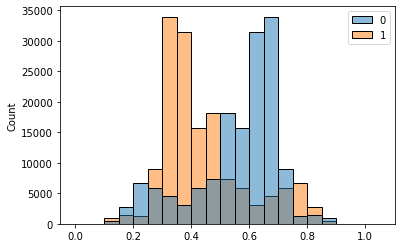

recall scores: [0.29583148 0.84099728]
threadshold 0.6655744842983298
v count
1    0.764488
0    0.235512
dtype: float64
              precision    recall  f1-score   support

           0       0.70      0.30      0.42     83027
           1       0.48      0.84      0.62     65458

    accuracy                           0.54    148485
   macro avg       0.59      0.57      0.52    148485
weighted avg       0.61      0.54      0.50    148485



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

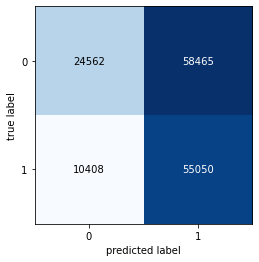

In [209]:
bins = np.arange(0,1.1,0.05)
params = study.best_params
thrd = params.pop('threshold_cut')
model_LGBOPT = lgb.sklearn.LGBMClassifier(**params)
model_LGBOPT.fit(X_train,y_train)
sns.histplot(pd.DataFrame(model_LGBOPT.predict_proba(X_test)),bins=bins)
plt.Line2D([thrd,thrd],[0,ynd_test.size],color='red')
plt.show()
isCovid = pd.Series(model_LGBOPT.predict_proba(X_test)[:,0])
cond = lambda x:(0 if x>thrd else 1)
y_predProb = isCovid.map(cond)
print('recall scores:',recall_score(y_test,y_predProb,average=None))
print('threadshold',thrd)
print('v count')
print(y_predProb.value_counts(normalize=True))#plt.show()
print(classification_report(y_test,y_predProb))
cm = confusion_matrix(y_test,y_predProb)
plot_confusion_matrix(conf_mat=cm)
plt.show()

# analise dos resultados
Conseguimos dois objetivos operacionais, Um recall alto para os posítivos (A maioria dos verdadeiros positivos foram preditos como posítivos), e uma precisão alta para os negativos (A maioria dos que se prediz como negatívo é realmente negativo)
ainda que menos do 10% seja considerado negativo, fica uma população menor circulando, e q pode se fazer testes para validar.


# geração de predição para o SubM
* Importação e tratamento de dados <br/>
* Predição

In [210]:
df_subm = pd.read_csv('COVID_subm.csv',index_col=0)
df_subm['icu'].mask(df_subm['patient_type']==1,0,inplace=True)
df_subm['intubed'].mask(df_subm['patient_type']==1,0,inplace=True)
df_subm['contact_other_covid'].mask(df_subm['contact_other_covid'].isna(),0,inplace=True)
df_subm['pregnancy'].mask(df_subm['sex']==0,0,inplace=True) 
df_subm.dropna(inplace=True)
covid_prob = pd.Series(model_LGBOPT.predict_proba(df_subm)[:,0])
cond = lambda x:(0 if x>thrd else 1)
y_predProb = covid_prob.map(cond)
print('y count:')
print(y_predProb.value_counts(normalize=True))

print(df_subm.head())
print(df_subm.info())

#df_subm.groupby('is_covid').size()


y count:
1    0.758065
0    0.241935
dtype: float64
        sex  patient_type  intubed  pneumonia  age  pregnancy  diabetes  copd  \
373402    1             1      0.0        0.0   35        0.0       0.0   0.0   
181022    0             1      0.0        0.0   26        0.0       0.0   0.0   
317841    0             1      0.0        0.0   57        0.0       0.0   0.0   
272745    1             1      0.0        0.0   40        0.0       0.0   0.0   
153280    0             0      0.0        0.0   55        0.0       0.0   0.0   

        asthma  inmsupr  hypertension  other_disease  cardiovascular  obesity  \
373402     0.0      0.0           0.0            0.0             0.0      1.0   
181022     0.0      0.0           0.0            0.0             0.0      0.0   
317841     0.0      0.0           0.0            0.0             0.0      0.0   
272745     0.0      0.0           0.0            0.0             0.0      0.0   
153280     0.0      0.0           0.0            0.0    

# Considerações finais
No modelo de treinamento como na amostra do SubM, vemos que se mantem a proporção de consideração de posítivos está maior que a base, se for para aplicar teste, seria para o 25 % restante, e o resto submeter a cuidados e precaução
